<h1 style="color:#001f3f">1. Introduction</h1>

<h2 style="color:#0050a0">1.1 Research Topic</h2>
<div style="text-align: justify">
Stereochemistry is an important concept in organic chemistry for understanding molecules' behavior in biological systems. Indeed, the spatial arrangement of atoms in a molecule can significantly influence how that molecule interacts with enzymes and other biomolecules. Stereoisomers - compounds that have the same molecular formula but differ in the 3D orientation of their atoms - often exhibit different properties. A thorough understanding of stereochemistry is therefore essential in fields such as pharmaceutical chemistry, where the difference between isomers can mean the difference between a therapeutic and a toxic effect.
</div>

<h2 style="color:#0050a0">1.2 Settings: Niche</h2>
<div style="text-align: justify">
While there are tools for drawing molecules and naming stereoisomers, few are designed to be interactive learning tools. Most tools and materials explain stereochemistry in a serious and technical way, but they are not fun or easy to use. Because of that, students often find it hard to really understand the topic. Furthermore, current tools often do not simplify the challenge of identifying stereocenters or visualizing all possible stereoisomers for a given molecule, especially from linear notations like SMILES.
</div>

<h2 style="color:#0050a0">1.3 Problem</h2>
<div style="text-align: justify">
Students often struggle when it comes to understanding and visualizing stereoisomers, particularly when translating 2D representations into 3D structures. As a result, students may fail to understand how chirality and molecular orientation influence chemical behavior. After struggling with the concepts of stereochemistry, the idea of this project seemed obvious to us: we wanted to create an interface to get acquainted with stereoisomers, nomenclature, and chirality. Thus, in this project, we tried to put as many functionalities as possible into a Streamlit interface, which we hope will serve as a helpful and intuitive tool for users.
</div>

<h2 style="color:#0050a0">1.4 Solution</h2>
<div style="text-align: justify">
This project presents a Python-based tool that automatically detects chiral centers and calculates the number of possible stereoisomers of a given molecule. Using cheminformatics libraries such as RDKit, the tool processes SMILES input and outputs an intuitive stereochemical analysis. The aim is to create an accessible, educational resource that not only aids students in mastering stereochemistry but also serves as a basis for further computational chemistry applications.
</div>

<h1 style="color:#001f3f">2. Materials and methods</h1>

<div style="text-align: justify">
This application was developed using Python and Streamlit to create an interactive tool for exploring and studying stereochemistry, with a particular focus on stereoisomer identification and naming. The tool integrates molecule drawing, stereoisomer generation, and chiral center identification into a user-friendly interface.
</div>

<h2 style="color:#0050a0">2.1 Technologies and libraries</h2>
<div style="text-align: justify">
The primary technologies used in the development of this project include:
</div>
<ul>
<li><strong>Python 3.8</strong>: The main programming language.</li>
<li><strong>Streamlit</strong>: Used for building the web interface and handling user interactions.</li>
<li><strong>RDKit</strong>: Employed for molecule parsing, stereoisomer generation, chiral center identification, and image rendering.</li>
<li><strong>PubChemPy</strong>: Utilized for retrieving IUPAC names from the PubChem database.</li>
<li><strong>streamlit_ketcher</strong>: Integrated to allow users to draw chemical structures directly in the application interface.</li>
</ul>
<div style="text-align: justify">
All dependencies were installed via pip and the application was run locally through the Streamlit CLI.
</div>

<h2 style="color:#0050a0">2.2 Streamlit application structure</h2>
<div style="text-align: justify">
The application is organized into three main tabs:
</div>
<ol>
<li><strong>Input a Molecule</strong>:<br>
<div style="text-align: justify">
Users can either draw a molecule using the Ketcher editor or enter a molecule name which is then interpreted using PubChemPy. For both input methods, the application converts the structure into a canonical SMILES representation and removes any stereochemistry, ensuring that isomer enumeration starts from a consistent base.
</div>
</li>
<li><strong>Draw and Guess Stereoisomers</strong>:<br>
<div style="text-align: justify">
The core functionality of this tab involves the generation of all possible stereoisomers using a custom function, <code>generate_isomers</code>, which relies on RDKit’s stereoisomer enumeration capabilities. Users attempt to draw valid stereoisomers of the input molecule, which are then checked for correctness by comparing their canonical isomeric SMILES to the generated set. The application provides feedback, tracks user guesses, and includes features such as scorekeeping, hints, and timing mechanisms. Users can also validate their drawn isomers by inputting corresponding IUPAC names, which are compared against PubChem-derived names.
A score system is also established, assigning a point for all correct answers.
</div>
</li>
<li><strong>Chirality</strong>:<br>
<div style="text-align: justify">
In this section, users can try to identify the chiral centers of the input molecule. The RDKit library is used to determine the atoms with possible chirality, which are then visually highlighted in molecular images. Users select atoms they believe to be chiral using checkboxes.
</div>
</li>
</ol>
<div style="text-align: justify">
A sidebar is also present on the left side of the application. Here, it is possible to input a molecule by name, and the current chosen molecule (without sterical information) is displayed using RDKit for easier visualization during the stereoisomer guessing.
</div>

<h2 style="color:#0050a0">2.3 Variables management</h2>
<div style="text-align: justify">
The application relies on Streamlit's session state system to store variables during its usage. This mechanism allows the app to remember variables between user interactions. Without this method, information would be lost because Streamlit re-runs the entire script after any change. Therefore, session state is used to keep track of the user's progress and decisions throughout the application; the session state variables are only updated or deleted when explicitly instructed to do so.
</div>

<div style="text-align: justify">
Variables stored in session state includes, among others, the input molecule selected by the user, the stereoisomers they have guessed so far, their current score, any names they have submitted for validation, and whether they have requested a hint or chosen to reveal the correct answers.
</div>

<div style="text-align: justify">
By storing this data in session state, the application can provide a seamless and responsive experience where progress is preserved and the interface remains interactive.
</div>

<h2 style="color:#0050a0">2.4 User experience</h2>
<div style="text-align: justify">
The interface includes a custom background image for visual appeal and uses Streamlit’s layout capabilities (such as columns and placeholders) to dynamically update feedback messages, images, and scores. Correct answers are rewarded with balloons as a playful visual effect.
</div>

<h2 style="color:#0050a0">2.5 Implementation details</h2>
<div style="text-align: justify">
This section describes the main ideas used to implement the functionality in the "Draw isomers" and "Chirality" tabs, followed by an overview of two central functions that support the application's internal logic while keeping the overall code cleaner.
</div>

<h3 style="color:#3399ff">Guessing the isomers (Tab 2)</h3>
<div style="text-align: justify">
In this tab, users are asked to guess all the possible isomers of the molecule that has previously input. The programming logic begins by generating the full set of stereoisomers from the SMILES string of the input molecule. These stereoisomers are stored as a set of canonical SMILES strings that retain stereochemical detail (i.e., using @ for R/S centers or \ and / for E/Z bonds). This set is treated as the reference for comparison with the isomers drawn by the user.
</div>

<div style="text-align: justify">
When users enter their guesses through the ketcher interface, the retrieved SMILES string is canonicalized and checked by comparing it with the reference set. If the guess matches a stereoisomer that is present in the set of "solutions" and that had not been guessed yet, it is recorded as correct and added to the set of correct isomers that have been found. This structure enables real-time feedback without storing redundant data, and avoids false positives due to duplicate or equivalent representations.
</div>

<div style="text-align: justify">
The second part of the tab challenges users to name the specific stereoisomers that they have drawn using correct IUPAC nomenclature. Users must correctly describe its configuration (R/S or E/Z) in their answer. The program validates this by comparing the input name with the name retrieved from the molecule's SMILES using PubChem.
</div>

<h3 style="color:#3399ff">Chirality (Tab 3)</h3>
<div style="text-align: justify">
This tab asks the user to identify all the chiral centers of the input molecule. When a molecule (as a SMILES string) is available in the session, it converts the SMILES into an RDKit molecule object. It then iterates through each atom, checking the RDKit <code>_ChiralityPossible</code> property to detect potential chiral centers, and stores their indices in a list.
</div>

<div style="text-align: justify">
The program then compares the user’s selection through checkboxes (which is also a list) with the actual chiral atom list (chiral_atoms). If they match, a success message and animation are triggered, controlled via a session state flag (balloons_shown). Finally, optional buttons allow users to toggle the display of the correct chiral atoms, storing the visibility preference in <code>st.session_state.show_chiral_atoms</code>.
</div>

<h3 style="color:#3399ff">Helper functions</h3>
<div style="text-align: justify">
Two helper functions support much of the core functionality described above: <code>generate_isomers</code> and <code>update_input_molecule</code>.
</div>

<div style="text-align: justify">
The <code>generate_isomers</code> function takes a SMILES string and returns a set of all unique stereoisomers corresponding to that molecule. It relies on RDKit’s built-in enumeration tools to identify all undefined stereocenters and systematically generate the missing stereochemical variants. Importantly, it uses enumeration options that ignore already-defined centers, so only ambiguous or incomplete stereochemistry is expanded. The output is returned as a set of canonical SMILES strings with full stereochemical specification, which are then used for validation, comparison, and selection throughout the app.
</div>


Set of generated isomers (output of the function):

{'C/C=C/[C@H](C)F', 'C/C=C/[C@@H](C)F', 'C/C=C\\[C@@H](C)F', 'C/C=C\\[C@H](C)F'}

Corresponding images from set of generated isomers:


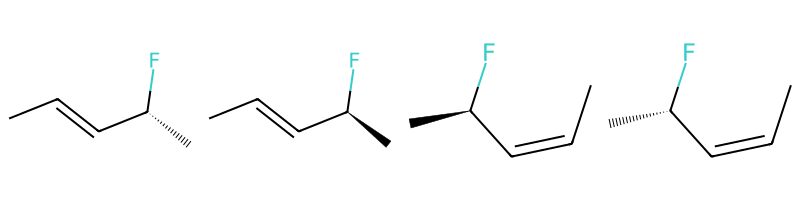

In [11]:
from stereochem.functions import generate_isomers
from rdkit import Chem
from rdkit.Chem import Draw

isomer_set = generate_isomers("CC=CC(C)F")
print(f"Set of generated isomers (output of the function):\n\n{isomer_set}\n")

mols = [Chem.MolFromSmiles(smiles) for smiles in sorted(isomer_set)]

img = Draw.MolsToImage(mols, molsPerRow=len(mols), subImgSize=(200, 200))
print("Corresponding images from set of generated isomers:")
img


The `update_input_molecule` function is used to reset the application state each time a new molecule is selected.
It updates the main SMILES string and clears all relevant session variables, such as previously guessed isomers, score, answer visibility, validated names, and timers. This ensures the user starts fresh with every new challenge.

An example that illustrates how the function resets the session state variables is presented below, with lactic acid as an example. 

In [23]:
from stereochem.functions import update_input_molecule
import streamlit as st
import pprint

# Custom class to mimic Streamlit's SessionState behavior
class FakeSessionState(dict):
    def __getattr__(self, key):
        return self[key]
    def __setattr__(self, key, value):
        self[key] = value
    def __delattr__(self, key):
        del self[key]

# Initial fake session state
st.session_state = FakeSessionState({
    "main_smiles": "CC(O)C(=O)O",
    "guessed_molecules": {'C[C@@H](O)C(=O)O', 'C[C@H](O)C(=O)O'},
    "score": 2,
    "show_answers": True,
    "hint": True,
    "show_chiral_atoms": True,
    "validated_names": {"(R)-2-fluorobutane"},
    "name_validation_status": {"(R)-2-fluorobutane": True},
    "all_iupac_validated": True,
    "balloons_shown": True,
    "start_time": "12:00",
    "end_time_structures": "12:05",
    "chrono_text": "00:05",
    "Atom1": True,
    "Atom2": True,
})

print("Initial session state:")
pprint.pprint(dict(st.session_state))

update_input_molecule("CC=CC(C)F")

print("\nUpdated session state:")
pprint.pprint(dict(st.session_state))


Initial session state:
{'Atom1': True,
 'Atom2': True,
 'all_iupac_validated': True,
 'balloons_shown': True,
 'chrono_text': '00:05',
 'end_time_structures': '12:05',
 'guessed_molecules': {'C[C@@H](O)C(=O)O', 'C[C@H](O)C(=O)O'},
 'hint': True,
 'main_smiles': 'CC(O)C(=O)O',
 'name_validation_status': {'(R)-2-fluorobutane': True},
 'score': 2,
 'show_answers': True,
 'show_chiral_atoms': True,
 'start_time': '12:00',
 'validated_names': {'(R)-2-fluorobutane'}}

Updated session state:
{'Atom1': False,
 'Atom2': False,
 'chrono_text': '',
 'guessed_molecules': set(),
 'hint': False,
 'main_smiles': 'CC=CC(C)F',
 'name_validation_status': {},
 'score': 0,
 'show_answers': False,
 'show_chiral_atoms': False}


<h1 style="color:#001f3f">3. Results and discussion</h1>

<h2 style="color:#0050a0">3.1 Challenges encountered</h2>
<div style="text-align: justify">
Each of the following paragraphs focuses on a specific technical or practical challenge that emerged during development, as well as the strategy adopted to address it.
</div>

<h3 style="color:#3399ff">Installation and Environment Management</h3>
<div style="text-align: justify">
<p>
The first problem we faced occurred before starting the main part of the project: during an exercise session, we encountered issues installing the <code>rdkit</code> package, which was not compatible with the most recent version of Python. This issue affected only Windows users. To resolve it, we installed Python 3.8 and created an environment around it, ensuring compatibility with RDKit.
</p>
<p>
In addition, one group member experienced problems running the Streamlit interface. Although the code executed without errors, the interface did not display as expected. It turned out that the issue was related to the <code>ketcher</code> package, which failed to function in the environment for an unknown reason - even the teaching assistant was unable to identify the cause. Recreating a new environment with the necessary packages for the project appeared to work. This problem affected our group work, as that student was unable to test the code and see the resulting modifications on the Streamlit interface to check how it would render to the user. Thus, it led to additional delays and coordination challenges within the team.
</p>

</div>

<h3 style="color:#3399ff">Difficulties with input mode</h3>
<div style="text-align: justify">
Managing multiple input modes for molecule submission (either via drawing or name) initially relied on an <code>input_mode</code> session state variable to distinguish between the two; this variable was set to "draw" or "name" depending on where the input came from. However, this approach led to synchronization issues, requiring users to resubmit inputs for changes to register correctly. It also interfered with downstream logic -such as triggering balloons or re-initializing session state variables- which caused unintended behaviors like mistriggered balloons or inconsistent validation feedback. To solve this issue, this logic was replaced with a single <code>st.session_state.main_smiles</code> variable that tracks the canonical, stereochemistry-free version of the current molecule. Any new input (regardless of origin; drawing or naming) updates this variable only if the newly input molecule differs from the existing one. This streamlined method resolved the timing inconsistencies and ensured clean, predictable state transitions across the app.
</div>

<h3 style="color:#3399ff">Use of Streamlit Balloons</h3>
<div style="text-align: justify">
<p>
One thing that has proved to be useful is the streamlit function <code>st.balloons()</code>. Indeed, it caused issues when triggered multiple times or at unexpected. Subsequently, it helped us identify problems such as improper code indentation or variables and session state should be added to avoid confusion when calling functions.
</p>
<p>
For example, in Tab 3 (Chirality), the balloons unexpectedly appeared when the user clicked on the "Show Answers" button - after the user had already correctly identified all the chiral centers and seen the balloons before. This showed us that the balloons were being triggered multiple times due to missing or improperly managed session state variables. By fixing this, we ensured balloons only appear once at the right moment.
</p>
<p>
It also helped us identify a problem that occurred when inputting a first molecule by name and then another molecule by drawing: the balloons appeared after identifying only one stereoisomer of the second molecule, instead of after all were found. Thus, it was essential to create the function <code>update_input_molecule</code> - previously introduced in the methods section - to ensure the list of stereoisomers was reset every time a new molecule was tested, regardless of the input mode used.
</p>

</div>

<h2 style="color:#0050a0">3.2 Limitations and future improvements</h2>
<div style="text-align: justify">
This section addresses the known limitations of the current implementation and suggests what could be improved, added, or refined if more time were available.
</div>

<h3 style="color:#3399ff">Incomplete PubChem data</h3> <div style="text-align: justify">
One of the limitations that have been encountered is due to the incompleteness of stereochemical nomenclature data retrieved from PubChem. For relatively simple molecules, PubChem typically provides IUPAC names not only for the general compound but also for each specific stereoisomer, allowing the application to validate user input against these names. However, this is not consistent across all molecules. In certain cases, PubChem only supplies the name of the general (non-stereospecific) compound and possibly one of the stereoisomers (often the most stable or most commonly studied form). An example of the application output in such a case (for 2-chloro-3-fluorobut-2-ene) is shown in the image below. 

This inconsistency derives from the way PubChem’s Compound database is structured. Not all stereoisomers are registered with their own distinct SMILES unless they have been explicitly submitted to the database. As a result, many stereoisomers either do not exist as separate entries or are missing IUPAC name annotations, making reliable validation through PubChem impossible in those cases.

This limitation cannot be resolved using the current PubChem library. It would be necessary to integate a more specialized chemical database or nomenclature engine capable of generating IUPAC names for arbitrary stereoisomers, though these solutions often come with licensing or integration challenges.

<div style="text-align: center">
<img src="example_problem_pubchem.png" alt="PubChem incompleteness example: 2-chloro-3-fluorobut-2-ene" width="40%"/>
  <div style="font-size: 90%; color: #555; margin-top: 5px;">
    <em>PubChem incompleteness example – 2-chloro-3-fluorobut-2-ene</em>
  </div>
</div>
</div>

<h3 style="color:#3399ff">Score updating after showing answers</h3> 
<div style="text-align: justify"> 
A limitation that remains unresolved is the behavior of the scoring mechanism after the user clicks the "Show Answers" button. Ideally, once answers are revealed, the score should not have the possibility of still increasing with user input, since they have already seen the answers. However, due to time constraints, this logic was not implemented. As a result, the score continues to increment even after answers are shown.
</div> 

<h3 style="color:#3399ff">Double-button submission in Ketcher input</h3> 
<div style="text-align: justify"> 
A usability issue arose in relation to the integration of the <code>st_ketcher</code> component. For proper input handling and state management, the molecular drawing tool had to be placed within an external container that decouples the act of drawing from the actual submission of a molecule. This design required adding a separate "Submit Drawing" button, distinct from Ketcher’s built-in "Apply" button. While this additional confirmation step ensures that variables are correctly updated in any context, it reduced the overall intuitiveness of the interface. No better alternative was found.
</div> 

<h3 style="color:#3399ff">Limitations for Coordination Complexes</h3> 
<div style="text-align: justify"> 
<p>
The original ambition of the project was to support not only organic stereochemistry but also coordination complexes, such as those found in transition metal chemistry. However, this proved to be significantly more complex. Unlike organic molecules, coordination compounds do not benefit from well-defined, standardized representations in available libraries. A comprehensive dictionary of 3D geometries, ligands, and naming conventions would have needed to be developed from scratch. Given the timeline of the project, this was not feasible. Therefore, the current application is limited to classical R/S and E/Z stereoisomers of organic molecules. 
</div> 

<h3 style="color:#3399ff">Point Group Determination Attempt</h3> 
<div style="text-align: justify"> 
An additional feature we wished to implement was the determination of the molecule's point group on the Streamlit interface. This could have been an opportunity for students to reinforce their understanding of molecular symmetry - a core concept in stereochemistry and spectroscopy. 
</p>
<p>
We tried packages such as <code>Open Babel</code> and <code>Pybel</code>, which are designed to analyze molecular geometry and identify symmetry elements by detecting operations like mirror planes, rotation axes, and inversion centers. <code>Open Babel</code> is a cheminformatics toolkit that can convert between molecular file formats (e.g., SMILES, SDF, MOL, PDB), generate 3D coordinates from 1D or 2D representations, and analyze molecular structures - including detecting aromaticity, chirality, rotatable bonds, and valence. Moreover, its symmetry detection can be based on the molecule's 3D geometry (and not just on SMILES).
</p>
<p>
However, when trying these packages on the interface, point group determination proved unreliable, as Open Babel and Pybel offered limited symmetry detection, because "unknown point group" was frequently returned. These limitations, along with a lack of time, prevented us from developing this feature further. Nevertheless, adding symmetry-related exercises remains a possible future improvement to enhance the educational value of the interface.
</p>

</div> 